In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dakshsharmaa/Prevalence-of-Irregular-Menstruation/Data/Prevalence%20of%20Irregular%20Menstruation.csv")

In [3]:
data.shape

(320, 38)

In [4]:
data.drop("Timestamp",axis=1,inplace=True)

In [5]:
data.drop("Gender",axis=1,inplace=True)

In [6]:
data.drop("By selecting 'I agree', you confirm that no coercion was exerted to fill this survey and you consent to provide information voluntarily without any monetary benefits attached to it. Do you agree?",axis=1,inplace=True)

###### Cleaning "Height" data

In [7]:
data.loc[(data["Height (in cm)"] > 10) & (data["Height (in cm)"] < 90),"Height (in cm)"] = None

In [8]:
for i in data["Height (in cm)"]:
    if i <90:
        data["Height (in cm)"].replace(i,(int(i)*30.48) + ((i-int(i))*2.54),inplace=True)

In [9]:
data["Height (in cm)"].fillna(data["Height (in cm)"].mean(),inplace=True)

In [10]:
data.head()

,Age,Height (in cm),Weight (in kg),Age at Menarche,What is the length of your menstrual cycle?,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,...,"In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,155.0,51.0,15,25,4,Yes,Yes,2.0,No,...,2,2,1,2,2,2,I do not exercise,Non-Smoker,I do not drink,No significant change
1,20,154.0,54.0,14,30,4,Yes,No,NaN,NaN,...,1,3,3,2,3,3,Alternate days,Non-Smoker,I do not drink,No significant change
2,18,160.0,54.0,11,28,5,"No, Heavy Bleeding",Yes,4.0,Yes,...,1,3,1,1,1,1,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,160.0,46.7,13,33,3,Yes,Yes,3.0,No,...,1,0,1,2,4,1,Once a week,Non-Smoker,I do not drink,No significant change
4,18,162.5,57.0,13,25,5,Yes,No,NaN,NaN,...,3,2,3,3,2,1,Alternate days,Non-Smoker,I do not drink,No significant change


##### Calculating BMI

In [11]:
BMI = (data["Weight (in kg)"] / data["Height (in cm)"] / data["Height (in cm)"])*10000
BMI = round(BMI,1)
BMI.tolist()

[21.2,
 22.8,
 21.1,
 18.2,
 21.6,
 19.1,
 30.0,
 14.7,
 18.0,
 23.0,
 26.1,
 24.1,
 16.9,
 24.8,
 24.3,
 23.9,
 16.8,
 21.8,
 18.5,
 24.8,
 25.9,
 15.6,
 23.0,
 25.7,
 16.9,
 20.1,
 21.1,
 22.9,
 20.5,
 28.7,
 18.0,
 20.8,
 21.9,
 15.6,
 26.7,
 18.8,
 20.0,
 23.8,
 22.0,
 24.0,
 22.1,
 22.0,
 20.1,
 18.6,
 20.2,
 20.8,
 19.2,
 28.7,
 18.7,
 22.0,
 18.8,
 25.3,
 23.2,
 21.1,
 18.9,
 19.6,
 32.8,
 23.1,
 22.2,
 20.5,
 23.1,
 20.1,
 21.5,
 21.3,
 20.9,
 22.0,
 22.6,
 21.9,
 17.5,
 27.0,
 17.1,
 20.3,
 21.5,
 22.7,
 23.6,
 17.7,
 19.1,
 22.1,
 31.4,
 22.4,
 23.2,
 28.3,
 23.4,
 20.7,
 13.2,
 24.9,
 20.1,
 25.5,
 24.2,
 17.1,
 32.5,
 17.7,
 22.8,
 17.9,
 25.0,
 17.5,
 14.8,
 24.2,
 23.3,
 16.9,
 20.8,
 26.1,
 22.0,
 21.1,
 10.9,
 22.9,
 24.7,
 22.5,
 20.4,
 27.4,
 27.5,
 13.7,
 18.0,
 22.8,
 20.7,
 23.0,
 20.5,
 24.0,
 27.0,
 19.1,
 29.3,
 18.8,
 17.3,
 20.0,
 28.4,
 20.8,
 13.3,
 19.2,
 19.9,
 22.1,
 19.7,
 26.3,
 23.3,
 28.9,
 26.7,
 18.6,
 19.8,
 16.6,
 19.4,
 23.8,
 22.5,
 20.4,
 18.8,

In [12]:
# Adding BMI column
data.insert(1,'BMI',BMI)

In [13]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,What is the length of your menstrual cycle?,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,...,"In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15,25,4,Yes,Yes,2.0,...,2,2,1,2,2,2,I do not exercise,Non-Smoker,I do not drink,No significant change
1,20,22.8,154.0,54.0,14,30,4,Yes,No,NaN,...,1,3,3,2,3,3,Alternate days,Non-Smoker,I do not drink,No significant change
2,18,21.1,160.0,54.0,11,28,5,"No, Heavy Bleeding",Yes,4.0,...,1,3,1,1,1,1,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,18.2,160.0,46.7,13,33,3,Yes,Yes,3.0,...,1,0,1,2,4,1,Once a week,Non-Smoker,I do not drink,No significant change
4,18,21.6,162.5,57.0,13,25,5,Yes,No,NaN,...,3,2,3,3,2,1,Alternate days,Non-Smoker,I do not drink,No significant change


In [14]:
data["Age at Menarche"].unique()

array([  15,   14,   11,   13,   12,   17,   10, 2016,   16,    9,    8,
         23], dtype=int64)

In [15]:
# Replacing 2016 with the mean
data.loc[data["Age at Menarche"]==2016,"Age at Menarche"] = None
data["Age at Menarche"].fillna(data["Age at Menarche"].mean(),inplace=True)

In [16]:
data["Age at Menarche"].unique()

array([15.        , 14.        , 11.        , 13.        , 12.        ,
       17.        , 10.        , 12.79937304, 16.        ,  9.        ,
        8.        , 23.        ])

In [17]:
data["Age at Menarche"]=data["Age at Menarche"].round(0)

In [18]:
data

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,What is the length of your menstrual cycle?,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,...,"In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.000,51.0,15.0,25,4,Yes,Yes,2.0,...,2,2,1,2,2,2,I do not exercise,Non-Smoker,I do not drink,No significant change
1,20,22.8,154.000,54.0,14.0,30,4,Yes,No,NaN,...,1,3,3,2,3,3,Alternate days,Non-Smoker,I do not drink,No significant change
2,18,21.1,160.000,54.0,11.0,28,5,"No, Heavy Bleeding",Yes,4.0,...,1,3,1,1,1,1,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,18.2,160.000,46.7,13.0,33,3,Yes,Yes,3.0,...,1,0,1,2,4,1,Once a week,Non-Smoker,I do not drink,No significant change
4,18,21.6,162.500,57.0,13.0,25,5,Yes,No,NaN,...,3,2,3,3,2,1,Alternate days,Non-Smoker,I do not drink,No significant change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,19,21.8,163.000,58.0,12.0,32,4,"No, Light Flow",Yes,12.0,...,2,4,2,1,2,2,Alternate days,Non-Smoker,I do not drink,No significant change
316,19,22.3,158.496,56.0,9.0,1,7,Yes,No,NaN,...,3,0,4,4,0,0,Alternate days,Non-Smoker,I do not drink,No significant change
317,20,21.8,159.000,55.0,12.0,30,5,Yes,Yes,1.0,...,0,4,0,0,4,4,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
318,19,17.2,160.000,44.0,11.0,28,6,Yes,Yes,28.0,...,2,3,1,1,2,4,Alternate days,Non-Smoker,Occasionally,"Yes, for the better"


In [19]:
data.rename({"What is the length of your menstrual cycle?":"Length of menstrual cycle"},inplace=True,axis=1)
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,...,"In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15.0,25,4,Yes,Yes,2.0,...,2,2,1,2,2,2,I do not exercise,Non-Smoker,I do not drink,No significant change
1,20,22.8,154.0,54.0,14.0,30,4,Yes,No,NaN,...,1,3,3,2,3,3,Alternate days,Non-Smoker,I do not drink,No significant change
2,18,21.1,160.0,54.0,11.0,28,5,"No, Heavy Bleeding",Yes,4.0,...,1,3,1,1,1,1,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,18.2,160.0,46.7,13.0,33,3,Yes,Yes,3.0,...,1,0,1,2,4,1,Once a week,Non-Smoker,I do not drink,No significant change
4,18,21.6,162.5,57.0,13.0,25,5,Yes,No,NaN,...,3,2,3,3,2,1,Alternate days,Non-Smoker,I do not drink,No significant change


In [20]:
len = data.loc[data["Is your menstrual flow normal?"]=="Yes","Length of menstrual cycle"]
len.replace([4,5,3,10],[30,30,30,60],inplace=True)

In [21]:
data.loc[data["Is your menstrual flow normal?"]=="Yes","Length of menstrual cycle"] = len

In [22]:
data.loc[data["Is your menstrual flow normal?"]=="Yes","Length of menstrual cycle"].unique()

array([25, 30, 33, 29, 28, 26, 40, 35, 27, 32, 24, 50, 20, 21, 38, 23, 37,
       31, 45, 22, 34, 36, 15, 60,  1], dtype=int64)

In [23]:
data["For how many days do you bleed?"].value_counts().sort_index()

1       1
2       1
3      40
4      78
5     121
6      41
7      34
8       2
20      1
60      1
Name: For how many days do you bleed?, dtype: int64

In [24]:
data.replace(60,10,inplace=True)   

In [25]:
data["For how many days do you bleed?"].value_counts().sort_index()

1       1
2       1
3      40
4      78
5     121
6      41
7      34
8       2
10      1
20      1
Name: For how many days do you bleed?, dtype: int64

In [26]:
data["Is your menstrual flow normal?"].value_counts()   

Yes                   237
No, Heavy Flow         46
No, Heavy Bleeding     17
No, Light Flow         16
No, Light Bleeding      4
Name: Is your menstrual flow normal?, dtype: int64

In [27]:
data["Is your menstrual flow normal?"].replace("No, Heavy Bleeding", "No, Heavy Flow", inplace=True)

In [28]:
data["Is your menstrual flow normal?"].replace("No, Light Bleeding", "No, Light Flow", inplace=True)

In [29]:
data["Is your menstrual flow normal?"].value_counts()   

Yes               237
No, Heavy Flow     63
No, Light Flow     20
Name: Is your menstrual flow normal?, dtype: int64

In [30]:
data.loc[data["Is your menstrual flow normal?"] == "Yes", "Is your menstrual flow normal?"] = 1

In [31]:
data.loc[data["Is your menstrual flow normal?"] == "No, Heavy Flow", "Is your menstrual flow normal?"] = 2

In [32]:
data.loc[data["Is your menstrual flow normal?"] == "No, Light Flow", "Is your menstrual flow normal?"] = 0

In [33]:
data["Is your menstrual flow normal?"].value_counts() 

1    237
2     63
0     20
Name: Is your menstrual flow normal?, dtype: int64

In [34]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,...,"In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15.0,25,4,1,Yes,2.0,...,2,2,1,2,2,2,I do not exercise,Non-Smoker,I do not drink,No significant change
1,20,22.8,154.0,54.0,14.0,30,4,1,No,NaN,...,1,3,3,2,3,3,Alternate days,Non-Smoker,I do not drink,No significant change
2,18,21.1,160.0,54.0,11.0,28,5,2,Yes,4.0,...,1,3,1,1,1,1,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,18.2,160.0,46.7,13.0,33,3,1,Yes,3.0,...,1,0,1,2,4,1,Once a week,Non-Smoker,I do not drink,No significant change
4,18,21.6,162.5,57.0,13.0,25,5,1,No,NaN,...,3,2,3,3,2,1,Alternate days,Non-Smoker,I do not drink,No significant change


In [35]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,...,"In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15.0,25,4,1,Yes,2.0,...,2,2,1,2,2,2,I do not exercise,Non-Smoker,I do not drink,No significant change
1,20,22.8,154.0,54.0,14.0,30,4,1,No,NaN,...,1,3,3,2,3,3,Alternate days,Non-Smoker,I do not drink,No significant change
2,18,21.1,160.0,54.0,11.0,28,5,2,Yes,4.0,...,1,3,1,1,1,1,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,18.2,160.0,46.7,13.0,33,3,1,Yes,3.0,...,1,0,1,2,4,1,Once a week,Non-Smoker,I do not drink,No significant change
4,18,21.6,162.5,57.0,13.0,25,5,1,No,NaN,...,3,2,3,3,2,1,Alternate days,Non-Smoker,I do not drink,No significant change


In [36]:
data["Have you ever faced irregular menstruation?"].value_counts()  

Yes    205
No     115
Name: Have you ever faced irregular menstruation?, dtype: int64

In [37]:
data.loc[data["Have you ever faced irregular menstruation?"] == "Yes", "Have you ever faced irregular menstruation?"] = 1

In [38]:
data.loc[data["Have you ever faced irregular menstruation?"] == "No", "Have you ever faced irregular menstruation?"] = 0

In [39]:
data["Have you ever faced irregular menstruation?"].value_counts()  

1    205
0    115
Name: Have you ever faced irregular menstruation?, dtype: int64

In [40]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,...,"In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15.0,25,4,1,1,2.0,...,2,2,1,2,2,2,I do not exercise,Non-Smoker,I do not drink,No significant change
1,20,22.8,154.0,54.0,14.0,30,4,1,0,NaN,...,1,3,3,2,3,3,Alternate days,Non-Smoker,I do not drink,No significant change
2,18,21.1,160.0,54.0,11.0,28,5,2,1,4.0,...,1,3,1,1,1,1,I do not exercise,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,18.2,160.0,46.7,13.0,33,3,1,1,3.0,...,1,0,1,2,4,1,Once a week,Non-Smoker,I do not drink,No significant change
4,18,21.6,162.5,57.0,13.0,25,5,1,0,NaN,...,3,2,3,3,2,1,Alternate days,Non-Smoker,I do not drink,No significant change


In [41]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [42]:
data.loc[data['Have you ever faced irregular menstruation?']== 0,['Have you ever faced irregular menstruation?','For how long have you faced irregular menstruation?','Is your menstrual cycle still irregular?','Do you know the reason behind your irregular menstrual cycle?','Have you tried any medications to regulate your menstruation?']]

,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?
1,0,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN
5,0,NaN,NaN,NaN,NaN
12,0,NaN,NaN,NaN,NaN
13,0,NaN,NaN,NaN,NaN
16,0,NaN,NaN,NaN,NaN
18,0,NaN,NaN,NaN,NaN
19,0,NaN,NaN,NaN,NaN
23,0,NaN,NaN,NaN,NaN
25,0,NaN,NaN,NaN,NaN


In [43]:
data.loc[data['Have you ever faced irregular menstruation?']== 1,['Have you ever faced irregular menstruation?','For how long have you faced irregular menstruation?','Is your menstrual cycle still irregular?','Do you know the reason behind your irregular menstrual cycle?','Have you tried any medications to regulate your menstruation?']]

,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?
0,1,2.0,No,No,Yes
2,1,4.0,Yes,No,No
3,1,3.0,No,No,No
6,1,28.0,No,"Yes, PCOD/PCOS",No
7,1,1.0,No,No,No
8,1,6.0,Yes,"Yes, PCOD/PCOS",Yes
9,1,5.0,No,No,Yes
10,1,6.0,Yes,"Yes, PCOD/PCOS",Yes
11,1,2.0,No,No,No
14,1,2.0,Yes,"Yes, PCOD/PCOS",No


In [44]:
data.loc[data["Have you ever faced irregular menstruation?"]== 0,["Have you ever faced irregular menstruation?","Length of menstrual cycle","For how many days do you bleed?"]].describe()

,Length of menstrual cycle,For how many days do you bleed?
count,115.000000,115.000000
mean,27.843478,4.739130
std,4.200232,1.100932
min,1.000000,2.000000
25%,27.000000,4.000000
50%,28.000000,5.000000
75%,30.000000,5.000000
max,45.000000,7.000000


In [45]:
data.loc[data["Have you ever faced irregular menstruation?"]== 1,["Have you ever faced irregular menstruation?","Length of menstrual cycle","For how many days do you bleed?"]].describe()

,Length of menstrual cycle,For how many days do you bleed?
count,205.000000,205.00000
mean,30.702439,5.00000
std,10.062756,1.65979
min,0.000000,1.00000
25%,28.000000,4.00000
50%,30.000000,5.00000
75%,33.000000,6.00000
max,120.000000,20.00000


In [46]:
data['How often do you exercise?'].value_counts()   # No error

Alternate days       102
I do not exercise    101
Daily                 64
Once a week           53
Name: How often do you exercise?, dtype: int64

In [47]:
data.loc[data["How often do you exercise?"] == "Alternate days", "How often do you exercise?"] = 2

In [48]:
data.loc[data["How often do you exercise?"] == "I do not exercise", "How often do you exercise?"] = 0

In [49]:
data.loc[data["How often do you exercise?"] == "Daily", "How often do you exercise?"] = 3

In [50]:
data.loc[data["How often do you exercise?"] == "Once a week", "How often do you exercise?"] = 1

In [51]:
data['How often do you exercise?'].value_counts()

2    102
0    101
3     64
1     53
Name: How often do you exercise?, dtype: int64

In [52]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?,Have you ever used any birth control medication/undergone a surgery?,What are some methods or techniques you have tried that helped you to regulate your menstruation?,"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.",I eat enough green vegetables.,I eat an ample amount of fruits rich in vitamin C.,I regularly eat nuts.,I often eat junk food.,I consume chicken and other non-vegetarian food on a regular basis.,I drink tea or coffee daily.,"In the last month, how often have you been upset because of something that happened unexpectedly?","In the last month, how often have you felt that you were unable to control the important things in your life?","In the last month, how often have you felt nervous and stressed?","In the last month, how often have you felt confident about your ability to handle your personal problems?","In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15.0,25,4,1,1,2.0,No,No,Yes,No,NaN,3,3,3,2,2,0,4,0,1,1,3,2,2,1,2,2,2,0,Non-Smoker,I do not drink,No significant change
1,20,22.8,154.0,54.0,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,4,4,4,1,1,3,3,2,3,3,2,Non-Smoker,I do not drink,No significant change
2,18,21.1,160.0,54.0,11.0,28,5,2,1,4.0,Yes,No,No,No,NaN,3,4,3,2,2,0,4,4,4,4,1,1,3,1,1,1,1,0,Non-Smoker,I do not drink,"Yes, for the worse"
3,19,18.2,160.0,46.7,13.0,33,3,1,1,3.0,No,No,No,No,NaN,2,3,2,3,2,0,2,3,4,4,1,1,0,1,2,4,1,1,Non-Smoker,I do not drink,No significant change
4,18,21.6,162.5,57.0,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,2,1,1,4,3,2,3,3,2,1,2,Non-Smoker,I do not drink,No significant change


In [53]:
data["Do you smoke?"].value_counts()  # No error

Non-Smoker        307
Current Smoker     13
Name: Do you smoke?, dtype: int64

In [54]:
data.loc[data["Do you smoke?"] == "Non-Smoker", "Do you smoke?"] = 1

In [55]:
data.loc[data["Do you smoke?"] == "Current Smoker", "Do you smoke?"] = 0

In [56]:
data["Do you smoke?"].value_counts()

1    307
0     13
Name: Do you smoke?, dtype: int64

In [57]:
data['How often do you consume alcohol?'].value_counts()  # No error

I do not drink    242
Occasionally       74
Often               4
Name: How often do you consume alcohol?, dtype: int64

In [58]:
data.loc[data["How often do you consume alcohol?"] == "Often", "How often do you consume alcohol?"] = 2

In [59]:
data.loc[data["How often do you consume alcohol?"] == "Occasionally", "How often do you consume alcohol?"] = 1

In [60]:
data.loc[data["How often do you consume alcohol?"] == "I do not drink", "How often do you consume alcohol?"] = 0

In [61]:
data['How often do you consume alcohol?'].value_counts()

0    242
1     74
2      4
Name: How often do you consume alcohol?, dtype: int64

In [62]:
data['Lastly, do you think the pandemic has affected your menstrual cycle? '].value_counts()   # No error

No significant change    233
Yes, for the worse        59
Yes, for the better       28
Name: Lastly, do you think the pandemic has affected your menstrual cycle? , dtype: int64

In [63]:
data.loc[data["Lastly, do you think the pandemic has affected your menstrual cycle? "] == "No significant change", "Lastly, do you think the pandemic has affected your menstrual cycle? "] = 1

In [64]:
data.loc[data["Lastly, do you think the pandemic has affected your menstrual cycle? "] == "Yes, for the worse", "Lastly, do you think the pandemic has affected your menstrual cycle? "] = 0

In [65]:
data.loc[data["Lastly, do you think the pandemic has affected your menstrual cycle? "] == "Yes, for the better", "Lastly, do you think the pandemic has affected your menstrual cycle? "] = 2

In [66]:
data['Lastly, do you think the pandemic has affected your menstrual cycle? '].value_counts() 

1    233
0     59
2     28
Name: Lastly, do you think the pandemic has affected your menstrual cycle? , dtype: int64

In [67]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?,Have you ever used any birth control medication/undergone a surgery?,What are some methods or techniques you have tried that helped you to regulate your menstruation?,"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.",I eat enough green vegetables.,I eat an ample amount of fruits rich in vitamin C.,I regularly eat nuts.,I often eat junk food.,I consume chicken and other non-vegetarian food on a regular basis.,I drink tea or coffee daily.,"In the last month, how often have you been upset because of something that happened unexpectedly?","In the last month, how often have you felt that you were unable to control the important things in your life?","In the last month, how often have you felt nervous and stressed?","In the last month, how often have you felt confident about your ability to handle your personal problems?","In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15.0,25,4,1,1,2.0,No,No,Yes,No,NaN,3,3,3,2,2,0,4,0,1,1,3,2,2,1,2,2,2,0,1,0,1
1,20,22.8,154.0,54.0,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,4,4,4,1,1,3,3,2,3,3,2,1,0,1
2,18,21.1,160.0,54.0,11.0,28,5,2,1,4.0,Yes,No,No,No,NaN,3,4,3,2,2,0,4,4,4,4,1,1,3,1,1,1,1,0,1,0,0
3,19,18.2,160.0,46.7,13.0,33,3,1,1,3.0,No,No,No,No,NaN,2,3,2,3,2,0,2,3,4,4,1,1,0,1,2,4,1,1,1,0,1
4,18,21.6,162.5,57.0,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,2,1,1,4,3,2,3,3,2,1,2,1,0,1


##### Calculation of Stress

In [68]:
data["In the last month, how often have you felt confident about your ability to handle your personal problems?"].replace({0: 4, 1: 3, 3: 1, 4: 0}, inplace=True)

In [69]:
data["In the last month, how often have you felt that things were going your way?"].replace({0: 4, 1: 3, 3: 1, 4: 0}, inplace=True)

In [70]:
data["In the last month, how often have you been able to control irritations in your life?"].replace({0: 4, 1: 3, 3: 1, 4: 0}, inplace=True)

In [71]:
data["In the last month, how often have you felt that you were on top of things?"].replace({0: 4, 1: 3, 3: 1, 4: 0}, inplace=True)

In [72]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?,Have you ever used any birth control medication/undergone a surgery?,What are some methods or techniques you have tried that helped you to regulate your menstruation?,"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.",I eat enough green vegetables.,I eat an ample amount of fruits rich in vitamin C.,I regularly eat nuts.,I often eat junk food.,I consume chicken and other non-vegetarian food on a regular basis.,I drink tea or coffee daily.,"In the last month, how often have you been upset because of something that happened unexpectedly?","In the last month, how often have you felt that you were unable to control the important things in your life?","In the last month, how often have you felt nervous and stressed?","In the last month, how often have you felt confident about your ability to handle your personal problems?","In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.0,51.0,15.0,25,4,1,1,2.0,No,No,Yes,No,NaN,3,3,3,2,2,0,4,0,1,1,1,2,2,3,2,2,2,0,1,0,1
1,20,22.8,154.0,54.0,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,4,4,4,3,3,3,1,2,3,3,2,1,0,1
2,18,21.1,160.0,54.0,11.0,28,5,2,1,4.0,Yes,No,No,No,NaN,3,4,3,2,2,0,4,4,4,4,3,3,3,3,3,1,1,0,1,0,0
3,19,18.2,160.0,46.7,13.0,33,3,1,1,3.0,No,No,No,No,NaN,2,3,2,3,2,0,2,3,4,4,3,3,0,3,2,4,1,1,1,0,1
4,18,21.6,162.5,57.0,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,2,1,1,0,1,2,1,1,2,1,2,1,0,1


In [73]:
data['Stress level']= data.iloc[:, 22:32].sum(axis=1)

In [74]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?,Have you ever used any birth control medication/undergone a surgery?,What are some methods or techniques you have tried that helped you to regulate your menstruation?,"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.",I eat enough green vegetables.,I eat an ample amount of fruits rich in vitamin C.,I regularly eat nuts.,I often eat junk food.,I consume chicken and other non-vegetarian food on a regular basis.,I drink tea or coffee daily.,"In the last month, how often have you been upset because of something that happened unexpectedly?","In the last month, how often have you felt that you were unable to control the important things in your life?","In the last month, how often have you felt nervous and stressed?","In the last month, how often have you felt confident about your ability to handle your personal problems?","In the last month, how often have you felt that things were going your way?","In the last month, how often have you found that you could not cope with all the things that you had to do?","In the last month, how often have you been able to control irritations in your life?","In the last month, how often have you felt that you were on top of things?","In the last month, how often have you been angered because of things that happened that were outside of your control?","In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?",Stress level
0,20,21.2,155.0,51.0,15.0,25,4,1,1,2.0,No,No,Yes,No,NaN,3,3,3,2,2,0,4,0,1,1,1,2,2,3,2,2,2,0,1,0,1,16
1,20,22.8,154.0,54.0,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,4,4,4,3,3,3,1,2,3,3,2,1,0,1,30
2,18,21.1,160.0,54.0,11.0,28,5,2,1,4.0,Yes,No,No,No,NaN,3,4,3,2,2,0,4,4,4,4,3,3,3,3,3,1,1,0,1,0,0,29
3,19,18.2,160.0,46.7,13.0,33,3,1,1,3.0,No,No,No,No,NaN,2,3,2,3,2,0,2,3,4,4,3,3,0,3,2,4,1,1,1,0,1,27
4,18,21.6,162.5,57.0,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,2,1,1,0,1,2,1,1,2,1,2,1,0,1,12


In [75]:
data.drop(data.iloc[:, 22:32], inplace = True, axis = 1)

In [76]:
data.head()

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?,Have you ever used any birth control medication/undergone a surgery?,What are some methods or techniques you have tried that helped you to regulate your menstruation?,"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.",I eat enough green vegetables.,I eat an ample amount of fruits rich in vitamin C.,I regularly eat nuts.,I often eat junk food.,I consume chicken and other non-vegetarian food on a regular basis.,I drink tea or coffee daily.,How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?",Stress level
0,20,21.2,155.0,51.0,15.0,25,4,1,1,2.0,No,No,Yes,No,NaN,3,3,3,2,2,0,4,0,1,0,1,16
1,20,22.8,154.0,54.0,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,2,1,0,1,30
2,18,21.1,160.0,54.0,11.0,28,5,2,1,4.0,Yes,No,No,No,NaN,3,4,3,2,2,0,4,0,1,0,0,29
3,19,18.2,160.0,46.7,13.0,33,3,1,1,3.0,No,No,No,No,NaN,2,3,2,3,2,0,2,1,1,0,1,27
4,18,21.6,162.5,57.0,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,2,1,0,1,12


In [77]:
temp1 = data['Stress level']
data.drop(labels=['Stress level'], axis=1, inplace = True)
data.insert(22, 'Stress level', temp1)
data

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?,Have you ever used any birth control medication/undergone a surgery?,What are some methods or techniques you have tried that helped you to regulate your menstruation?,"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.",I eat enough green vegetables.,I eat an ample amount of fruits rich in vitamin C.,I regularly eat nuts.,I often eat junk food.,I consume chicken and other non-vegetarian food on a regular basis.,I drink tea or coffee daily.,Stress level,How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.000000,51.00,15.0,25,4,1,1,2.0,No,No,Yes,No,NaN,3,3,3,2,2,0,4,16,0,1,0,1
1,20,22.8,154.000000,54.00,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,30,2,1,0,1
2,18,21.1,160.000000,54.00,11.0,28,5,2,1,4.0,Yes,No,No,No,NaN,3,4,3,2,2,0,4,29,0,1,0,0
3,19,18.2,160.000000,46.70,13.0,33,3,1,1,3.0,No,No,No,No,NaN,2,3,2,3,2,0,2,27,1,1,0,1
4,18,21.6,162.500000,57.00,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,12,2,1,0,1
5,17,19.1,162.000000,50.00,13.0,30,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,4,3,4,0,4,2,20,3,1,0,0
6,19,30.0,170.180000,87.00,14.0,29,5,1,1,28.0,No,"Yes, PCOD/PCOS",No,Yes,I had a surgery a few years back to remove som...,4,4,3,4,1,2,1,34,3,1,1,1
7,18,14.7,175.000000,45.00,13.0,20,7,2,1,1.0,No,No,No,No,NaN,2,2,2,2,3,0,0,26,0,1,0,1
8,21,18.0,170.000000,52.00,15.0,35,6,2,1,6.0,Yes,"Yes, PCOD/PCOS",Yes,No,hormone regulation,1,2,1,3,1,0,0,29,2,1,0,1
9,20,23.0,146.000000,49.00,12.0,28,5,1,1,5.0,No,No,Yes,No,NaN,3,2,4,3,2,3,2,17,2,1,1,1


##### Converting to numerical data

In [78]:
data['Is your menstrual cycle still irregular?'].value_counts()

No     116
Yes     89
Name: Is your menstrual cycle still irregular?, dtype: int64

In [79]:
data.loc[data["Is your menstrual cycle still irregular?"] == "No", "Is your menstrual cycle still irregular?"] = 0

In [80]:
data.loc[data["Is your menstrual cycle still irregular?"] == "Yes", "Is your menstrual cycle still irregular?"] = 1

In [81]:
data['Is your menstrual cycle still irregular?'].value_counts()

0    116
1     89
Name: Is your menstrual cycle still irregular?, dtype: int64

In [82]:
data['Have you tried any medications to regulate your menstruation?'].value_counts()

No     137
Yes     68
Name: Have you tried any medications to regulate your menstruation?, dtype: int64

In [83]:
data.loc[data["Have you tried any medications to regulate your menstruation?"] == "No", "Have you tried any medications to regulate your menstruation?"] = 0

In [84]:
data.loc[data["Have you tried any medications to regulate your menstruation?"] == "Yes", "Have you tried any medications to regulate your menstruation?"] = 1

In [85]:
data['Have you tried any medications to regulate your menstruation?'].value_counts()

0    137
1     68
Name: Have you tried any medications to regulate your menstruation?, dtype: int64

In [86]:
data.loc[data["Have you ever used any birth control medication/undergone a surgery?"] == "No", "Have you ever used any birth control medication/undergone a surgery?"] = 0

In [87]:
data.loc[data["Have you ever used any birth control medication/undergone a surgery?"] == "Yes", "Have you ever used any birth control medication/undergone a surgery?"] = 1

In [88]:
data['Have you ever used any birth control medication/undergone a surgery?'].value_counts()

0    180
1     25
Name: Have you ever used any birth control medication/undergone a surgery?, dtype: int64

In [89]:
data

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,For how many days do you bleed?,Is your menstrual flow normal?,Have you ever faced irregular menstruation?,For how long have you faced irregular menstruation?,Is your menstrual cycle still irregular?,Do you know the reason behind your irregular menstrual cycle?,Have you tried any medications to regulate your menstruation?,Have you ever used any birth control medication/undergone a surgery?,What are some methods or techniques you have tried that helped you to regulate your menstruation?,"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.",I eat enough green vegetables.,I eat an ample amount of fruits rich in vitamin C.,I regularly eat nuts.,I often eat junk food.,I consume chicken and other non-vegetarian food on a regular basis.,I drink tea or coffee daily.,Stress level,How often do you exercise?,Do you smoke?,How often do you consume alcohol?,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.000000,51.00,15.0,25,4,1,1,2.0,0,No,1,0,NaN,3,3,3,2,2,0,4,16,0,1,0,1
1,20,22.8,154.000000,54.00,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,30,2,1,0,1
2,18,21.1,160.000000,54.00,11.0,28,5,2,1,4.0,1,No,0,0,NaN,3,4,3,2,2,0,4,29,0,1,0,0
3,19,18.2,160.000000,46.70,13.0,33,3,1,1,3.0,0,No,0,0,NaN,2,3,2,3,2,0,2,27,1,1,0,1
4,18,21.6,162.500000,57.00,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,12,2,1,0,1
5,17,19.1,162.000000,50.00,13.0,30,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,4,3,4,0,4,2,20,3,1,0,0
6,19,30.0,170.180000,87.00,14.0,29,5,1,1,28.0,0,"Yes, PCOD/PCOS",0,1,I had a surgery a few years back to remove som...,4,4,3,4,1,2,1,34,3,1,1,1
7,18,14.7,175.000000,45.00,13.0,20,7,2,1,1.0,0,No,0,0,NaN,2,2,2,2,3,0,0,26,0,1,0,1
8,21,18.0,170.000000,52.00,15.0,35,6,2,1,6.0,1,"Yes, PCOD/PCOS",1,0,hormone regulation,1,2,1,3,1,0,0,29,2,1,0,1
9,20,23.0,146.000000,49.00,12.0,28,5,1,1,5.0,0,No,1,0,NaN,3,2,4,3,2,3,2,17,2,1,1,1


##### Renaming columns

In [90]:
data.rename({"For how many days do you bleed?":"Length of periods"},inplace=True,axis=1)

In [91]:
data.rename({"Is your menstrual flow normal?":"Menstrual flow"},inplace=True,axis=1)

In [92]:
data.rename({"Have you ever faced irregular menstruation?":"Irregular menstruation (Y/N)"},inplace=True,axis=1)

In [93]:
data.rename({"For how long have you faced irregular menstruation?":"Irregular menstruation (Months)"},inplace=True,axis=1)

In [94]:
data.rename({"Is your menstrual cycle still irregular?":"Irregular cycle (Y/N)"},inplace=True,axis=1)

In [95]:
data.rename({"Do you know the reason behind your irregular menstrual cycle?":"Reason for irregular cycle"},inplace=True,axis=1)

In [96]:
data.rename({"Have you tried any medications to regulate your menstruation?":"Medications (Y/N)"},inplace=True,axis=1)

In [97]:
data.rename({"Have you ever used any birth control medication/undergone a surgery?":"Birth control meds/Surgery (Y/N)"},inplace=True,axis=1)

In [98]:
data.rename({"I eat a balanced diet/ I eat foods that are high in antioxidants, nutrient-dense, and with plenty of protein.":"Consumption of balanced diet"},inplace=True,axis=1)

In [99]:
data.rename({"I eat enough green vegetables.":"Consumption of green vegetables"},inplace=True,axis=1)

In [100]:
data.rename({"I eat an ample amount of fruits rich in vitamin C.":"Consumption of vitamin C"},inplace=True,axis=1)

In [101]:
data.rename({"I often eat junk food.":"Consumption of Junk food"},inplace=True,axis=1)

In [102]:
data.rename({"I consume chicken and other non-vegetarian food on a regular basis.":"Consumption of non-veg food"},inplace=True,axis=1)

In [103]:
data.rename({"I drink tea or coffee daily.":"Consumption of tea/coffee daily"},inplace=True,axis=1)

In [104]:
data.rename({"How often do you exercise?":"Exercise"},inplace=True,axis=1)

In [105]:
data.rename({"Do you smoke?":"Smoking"},inplace=True,axis=1)

In [106]:
data.rename({"How often do you consume alcohol?":"Consumption of alcohol"},inplace=True,axis=1)

In [107]:
data.rename({"Lastly, do you think the pandemic has affected your menstrual cycle?":"Effect of pandemic on cycle"},inplace=True,axis=1)

In [108]:
data

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,Length of periods,Menstrual flow,Irregular menstruation (Y/N),Irregular menstruation (Months),Irregular cycle (Y/N),Reason for irregular cycle,Medications (Y/N),Birth control meds/Surgery (Y/N),What are some methods or techniques you have tried that helped you to regulate your menstruation?,Consumption of balanced diet,Consumption of green vegetables,Consumption of vitamin C,I regularly eat nuts.,Consumption of Junk food,Consumption of non-veg food,Consumption of tea/coffee daily,Stress level,Exercise,Smoking,Consumption of alcohol,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.000000,51.00,15.0,25,4,1,1,2.0,0,No,1,0,NaN,3,3,3,2,2,0,4,16,0,1,0,1
1,20,22.8,154.000000,54.00,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,30,2,1,0,1
2,18,21.1,160.000000,54.00,11.0,28,5,2,1,4.0,1,No,0,0,NaN,3,4,3,2,2,0,4,29,0,1,0,0
3,19,18.2,160.000000,46.70,13.0,33,3,1,1,3.0,0,No,0,0,NaN,2,3,2,3,2,0,2,27,1,1,0,1
4,18,21.6,162.500000,57.00,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,12,2,1,0,1
5,17,19.1,162.000000,50.00,13.0,30,5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3,4,3,4,0,4,2,20,3,1,0,0
6,19,30.0,170.180000,87.00,14.0,29,5,1,1,28.0,0,"Yes, PCOD/PCOS",0,1,I had a surgery a few years back to remove som...,4,4,3,4,1,2,1,34,3,1,1,1
7,18,14.7,175.000000,45.00,13.0,20,7,2,1,1.0,0,No,0,0,NaN,2,2,2,2,3,0,0,26,0,1,0,1
8,21,18.0,170.000000,52.00,15.0,35,6,2,1,6.0,1,"Yes, PCOD/PCOS",1,0,hormone regulation,1,2,1,3,1,0,0,29,2,1,0,1
9,20,23.0,146.000000,49.00,12.0,28,5,1,1,5.0,0,No,1,0,NaN,3,2,4,3,2,3,2,17,2,1,1,1


In [109]:
data.dtypes

Age                                                                                                    int64
BMI                                                                                                  float64
Height (in cm)                                                                                       float64
Weight (in kg)                                                                                       float64
Age at Menarche                                                                                      float64
Length of menstrual cycle                                                                              int64
Length of periods                                                                                      int64
Menstrual flow                                                                                        object
Irregular menstruation (Y/N)                                                                          object
Irregular menstruat

##### Converting Number of months into categories

In [110]:
data['Irregular menstruation (Months)'].max()

192.0

In [111]:
data['Irregular menstruation (Months)']=pd.cut(data['Irregular menstruation (Months)'], bins=[0, 6, 12, 24, 60, 193], include_lowest=True, labels=[0, 1, 2, 3, 4])

In [112]:
data.drop("What are some methods or techniques you have tried that helped you to regulate your menstruation?",axis=1,inplace=True)

In [113]:
data

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,Length of periods,Menstrual flow,Irregular menstruation (Y/N),Irregular menstruation (Months),Irregular cycle (Y/N),Reason for irregular cycle,Medications (Y/N),Birth control meds/Surgery (Y/N),Consumption of balanced diet,Consumption of green vegetables,Consumption of vitamin C,I regularly eat nuts.,Consumption of Junk food,Consumption of non-veg food,Consumption of tea/coffee daily,Stress level,Exercise,Smoking,Consumption of alcohol,"Lastly, do you think the pandemic has affected your menstrual cycle?"
0,20,21.2,155.000000,51.00,15.0,25,4,1,1,0,0,No,1,0,3,3,3,2,2,0,4,16,0,1,0,1
1,20,22.8,154.000000,54.00,14.0,30,4,1,0,NaN,NaN,NaN,NaN,NaN,3,2,3,4,2,0,4,30,2,1,0,1
2,18,21.1,160.000000,54.00,11.0,28,5,2,1,0,1,No,0,0,3,4,3,2,2,0,4,29,0,1,0,0
3,19,18.2,160.000000,46.70,13.0,33,3,1,1,0,0,No,0,0,2,3,2,3,2,0,2,27,1,1,0,1
4,18,21.6,162.500000,57.00,13.0,25,5,1,0,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,0,2,12,2,1,0,1
5,17,19.1,162.000000,50.00,13.0,30,5,1,0,NaN,NaN,NaN,NaN,NaN,3,4,3,4,0,4,2,20,3,1,0,0
6,19,30.0,170.180000,87.00,14.0,29,5,1,1,3,0,"Yes, PCOD/PCOS",0,1,4,4,3,4,1,2,1,34,3,1,1,1
7,18,14.7,175.000000,45.00,13.0,20,7,2,1,0,0,No,0,0,2,2,2,2,3,0,0,26,0,1,0,1
8,21,18.0,170.000000,52.00,15.0,35,6,2,1,0,1,"Yes, PCOD/PCOS",1,0,1,2,1,3,1,0,0,29,2,1,0,1
9,20,23.0,146.000000,49.00,12.0,28,5,1,1,0,0,No,1,0,3,2,4,3,2,3,2,17,2,1,1,1


In [114]:
cor = data.corr()

In [115]:
cor

,Age,BMI,Height (in cm),Weight (in kg),Age at Menarche,Length of menstrual cycle,Length of periods,Consumption of balanced diet,Consumption of green vegetables,Consumption of vitamin C,I regularly eat nuts.,Consumption of Junk food,Consumption of non-veg food,Consumption of tea/coffee daily,Stress level
Age,1.000000,0.260039,-0.051143,0.111296,0.078746,0.004813,-0.114321,0.063481,0.123230,0.045717,0.014306,0.035549,0.091959,0.121673,0.047823
BMI,0.260039,1.000000,-0.275381,0.551918,-0.066210,-0.031009,-0.101541,-0.003999,0.030431,0.051567,-0.040426,0.037844,0.067748,0.097269,0.116025
Height (in cm),-0.051143,-0.275381,1.000000,0.068797,0.037878,0.027486,-0.008245,0.081120,0.050246,0.095710,0.075127,-0.032425,0.038020,-0.090220,-0.042960
Weight (in kg),0.111296,0.551918,0.068797,1.000000,0.074535,-0.037054,-0.034679,0.043895,0.067583,0.137486,0.033808,0.009311,0.025843,0.074337,-0.008406
Age at Menarche,0.078746,-0.066210,0.037878,0.074535,1.000000,0.040883,0.002861,0.018551,0.018874,0.019943,0.067224,0.040994,0.050046,-0.002613,-0.074813
Length of menstrual cycle,0.004813,-0.031009,0.027486,-0.037054,0.040883,1.000000,-0.099175,0.055339,0.006843,0.043054,-0.039884,-0.046925,-0.031487,-0.049305,0.045759
Length of periods,-0.114321,-0.101541,-0.008245,-0.034679,0.002861,-0.099175,1.000000,-0.084195,-0.043033,-0.096916,-0.009373,0.015022,-0.039418,-0.083520,-0.122512
Consumption of balanced diet,0.063481,-0.003999,0.081120,0.043895,0.018551,0.055339,-0.084195,1.000000,0.520374,0.502281,0.284019,-0.250959,0.109962,-0.012063,-0.139465
Consumption of green vegetables,0.123230,0.030431,0.050246,0.067583,0.018874,0.006843,-0.043033,0.520374,1.000000,0.397769,0.198823,-0.287590,-0.060807,0.005836,-0.112189
Consumption of vitamin C,0.045717,0.051567,0.095710,0.137486,0.019943,0.043054,-0.096916,0.502281,0.397769,1.000000,0.316463,-0.121553,0.064409,-0.058935,-0.191697


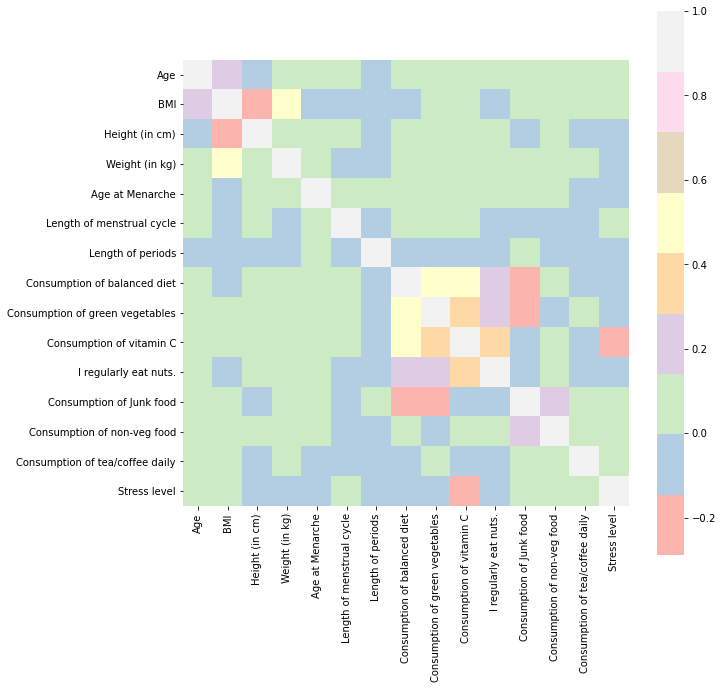

In [116]:
plt.subplots(figsize=(10,10))
sns.heatmap(cor,cmap="Pastel1", square=True);

In [117]:
data.to_csv('PIM_(320).csv')